In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
data_dir='ETH.csv'
df=pd.read_csv(data_dir)

In [4]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [5]:
df.tail()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume ETH,Volume USD
count,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03,1.438000e+03
mean,239.397149,248.919200,227.681446,239.468011,3.720638e+04,1.139557e+07
std,237.662224,248.677428,222.794938,237.606382,6.908336e+04,2.143780e+07
min,6.770000,7.290000,5.990000,6.770000,0.000000e+00,0.000000e+00
25%,79.782500,84.875000,74.677500,80.732500,7.020215e+03,7.541171e+05
50%,181.430000,187.020000,175.850000,181.430000,1.780439e+04,3.221372e+06
75%,297.735000,306.015000,287.427500,297.502500,4.204451e+04,1.204918e+07
max,1381.850000,1420.010000,1270.000000,1381.850000,1.827755e+06,2.221193e+08


In [8]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

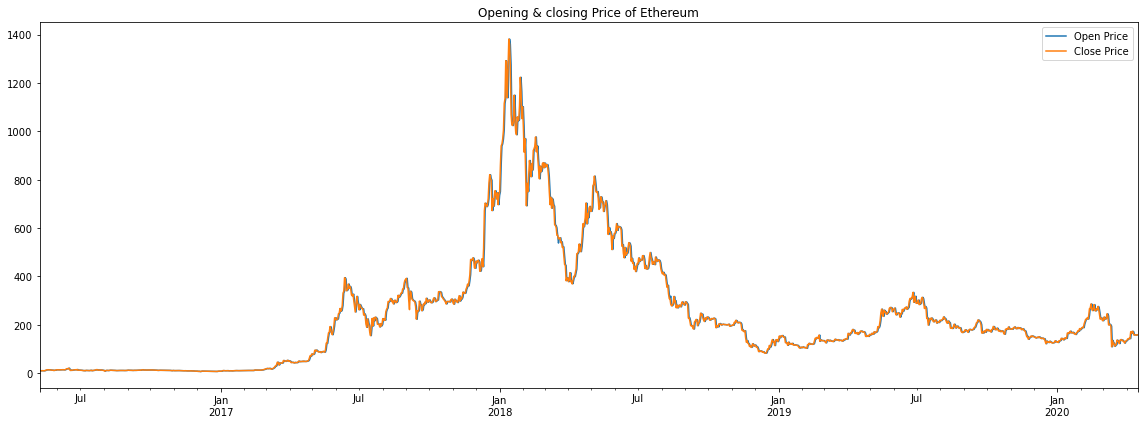

In [9]:
plt.figure(figsize=(16,6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & closing Price of Ethereum')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

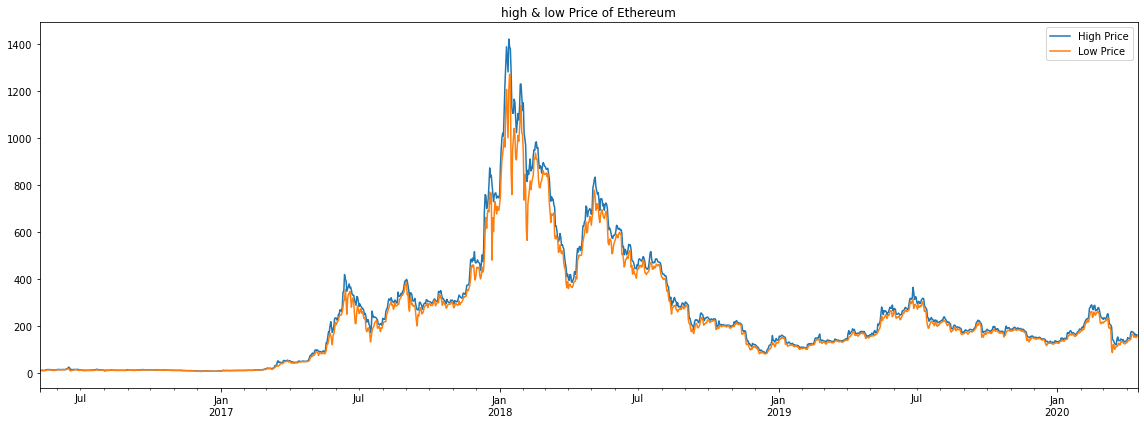

In [10]:
plt.figure(figsize=(16,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('high & low Price of Ethereum')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [11]:
n_cols=1
dataset=df[r'Close']
dataset=pd.DataFrame(dataset)
data=dataset.values
data.shape

(1438, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(data))

In [13]:
train_size=int(len(data)*0.75)
test_size=len(data)-train_size
print('Train Size:',train_size,'Test Size:',test_size)

Train Size: 1078 Test Size: 360


In [14]:
train_data=scaled_data[0:train_size, :]
train_data.shape

(1078, 1)

In [15]:
x_train=[]
y_train=[]
time_steps=60
n_cols=1
for i in range(time_steps,len(train_data)):
    x_train.append(train_data[i-time_steps:i,:n_cols])
    y_train.append(train_data[i,:n_cols])
    if i<=time_steps:
        print('X_Train',x_train)
        print('Y_Train',y_train)

X_Train [array([[0.11042267],
       [0.11042267],
       [0.10923001],
       [0.1103863 ],
       [0.11045903],
       [0.11016814],
       [0.11954941],
       [0.12123658],
       [0.1148515 ],
       [0.11978939],
       [0.09909969],
       [0.10032871],
       [0.09795066],
       [0.09802339],
       [0.09397999],
       [0.09210373],
       [0.09133287],
       [0.08561684],
       [0.09054019],
       [0.09091835],
       [0.09469267],
       [0.09423452],
       [0.09626349],
       [0.09444541],
       [0.08425692],
       [0.09140559],
       [0.09208192],
       [0.09469994],
       [0.08138436],
       [0.07993717],
       [0.07617011],
       [0.08486052],
       [0.08406784],
       [0.09354365],
       [0.07454839],
       [0.13649388],
       [0.14109725],
       [0.1425008 ],
       [0.14027547],
       [0.16783024],
       [0.1738517 ],
       [0.1610379 ],
       [0.15846351],
       [0.157809  ],
       [0.16390319],
       [0.1535038 ],
       [0.15314018],
    

In [16]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],n_cols))

In [18]:
x_train.shape,y_train.shape

((1018, 60, 1), (1018, 1))

In [19]:
model=Sequential([
    LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],n_cols)),
    LSTM(64,return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])
model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
32/32 [==============================] - 5s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0673
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0018 - mean_absolute_error: 0.0272
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0017 - mean_absolute_error: 0.0250
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0232
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0013 - mean_absolute_error: 0.0229
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.0013 - mean_absolute_error: 0.0237
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.0012 - mean_absolute_error: 0.0218
Epoch 8/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0011 - mean_absolute_error: 0.0209
Epoch 9/100
32/32 [==============================] - 1s 35ms/step - loss: 9.6197e-04 - mean_absolute_error: 0.01

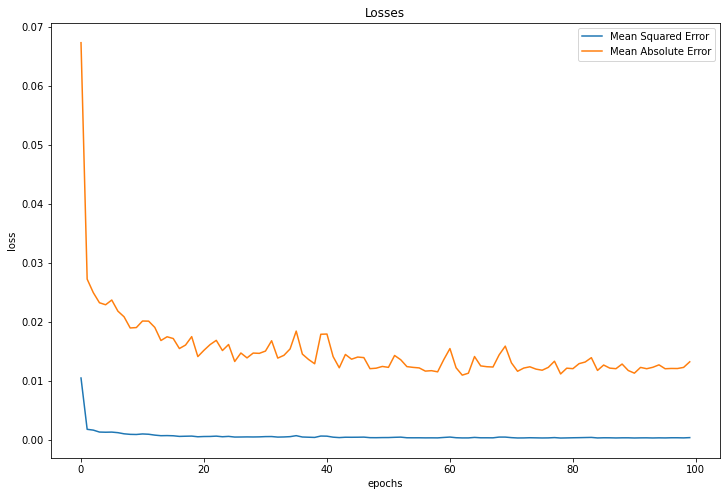

In [22]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [23]:
time_steps=60
test_data=scaled_data[train_size-time_steps:,:]
x_test=[]
y_test=[]
n_cols=1
for i in range(time_steps,len(test_data)):
    x_test.append(test_data[i-time_steps:i,0:n_cols])
    y_test.append(test_data[i,0:n_cols])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],n_cols))

In [24]:
x_test.shape,y_test.shape

((360, 60, 1), (360, 1))

In [25]:
predictions=model.predict(x_test)

12/12 [==============================] - 1s 13ms/step


In [26]:
predictions=scaler.inverse_transform(predictions)
predictions.shape

(360, 1)

In [27]:
y_test=scaler.inverse_transform(y_test)
rmse=np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

11.48

In [28]:
preds_acts=pd.DataFrame(data={'Predictions':predictions.flatten(),'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,82.959900,80.00
1,74.515663,77.70
2,69.081413,77.33
3,66.672043,79.71
4,67.205757,70.21
...,...,...
355,-1.512485,10.69
356,-1.414690,10.20
357,-1.592466,10.43
358,-1.556055,9.68


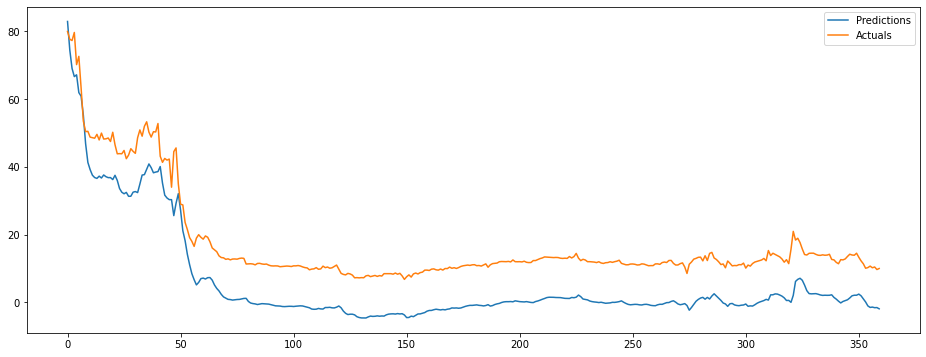

In [29]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions','Actuals'])
plt.show()

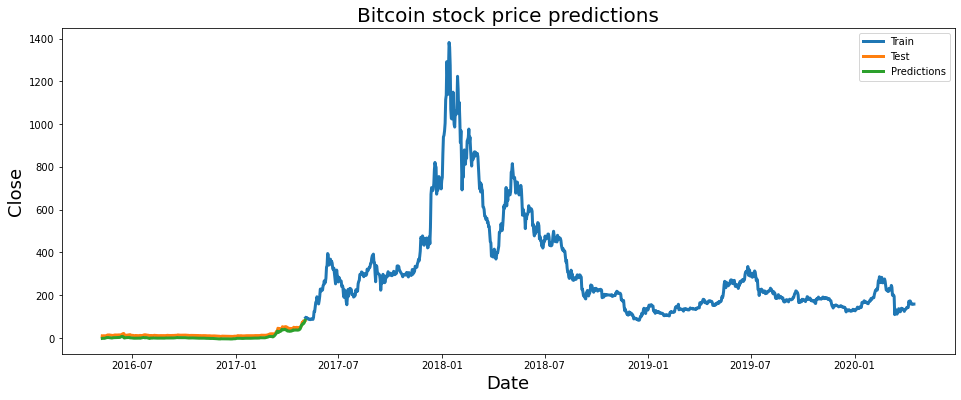

In [31]:
train=dataset.iloc[:train_size,0:1]
test=dataset.iloc[train_size:, 0:1]
test ['Predictions']=predictions
plt.figure(figsize=(16,6))
plt.title('Bitcoin stock price predictions',fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.plot(train[r'Close'],linewidth=3)
plt.plot(test[r'Close'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])